In [1]:
import matplotlib.pyplot as pl
import pandas as pd
import rules.enzymes_v04 as enz
enzymes = [item for item in dir(enz) if not item.startswith("__")]

pl.rcParams["font.family"] = "sans-serif"
pl.rcParams["font.size"] = 10

In [2]:
reports = ['v04_Rac1_dominant', 
           'v04_RhoA_dominant']

In [3]:
def plot_knockdowns(dataframe, ax, title, maxn):
    colors = ['#1f77b4', '#ff7f0e']
    ax = dataframe.plot.bar(width=0.8, color=colors, ax=ax)
    ax.legend(loc='lower right', bbox_to_anchor=(0.97, 1.0), ncol=2, 
              frameon=False, borderpad=0, borderaxespad=0,
              prop={'size':10})

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('left')

    ax.set_ylim(top=100)
    ax.set_ylabel('Weighted activity, %')
    ax.set_xlim(-0.5, maxn-0.5)
    ax.set_title(title, loc='left', x=0.03)
    br, st = dataframe.loc['base']

    ax.plot([-1, 100], [br, br], linewidth=1, linestyle='--', color=colors[0])
    ax.plot([-1, 100], [st, st], linewidth=1, linestyle='--', color=colors[1])

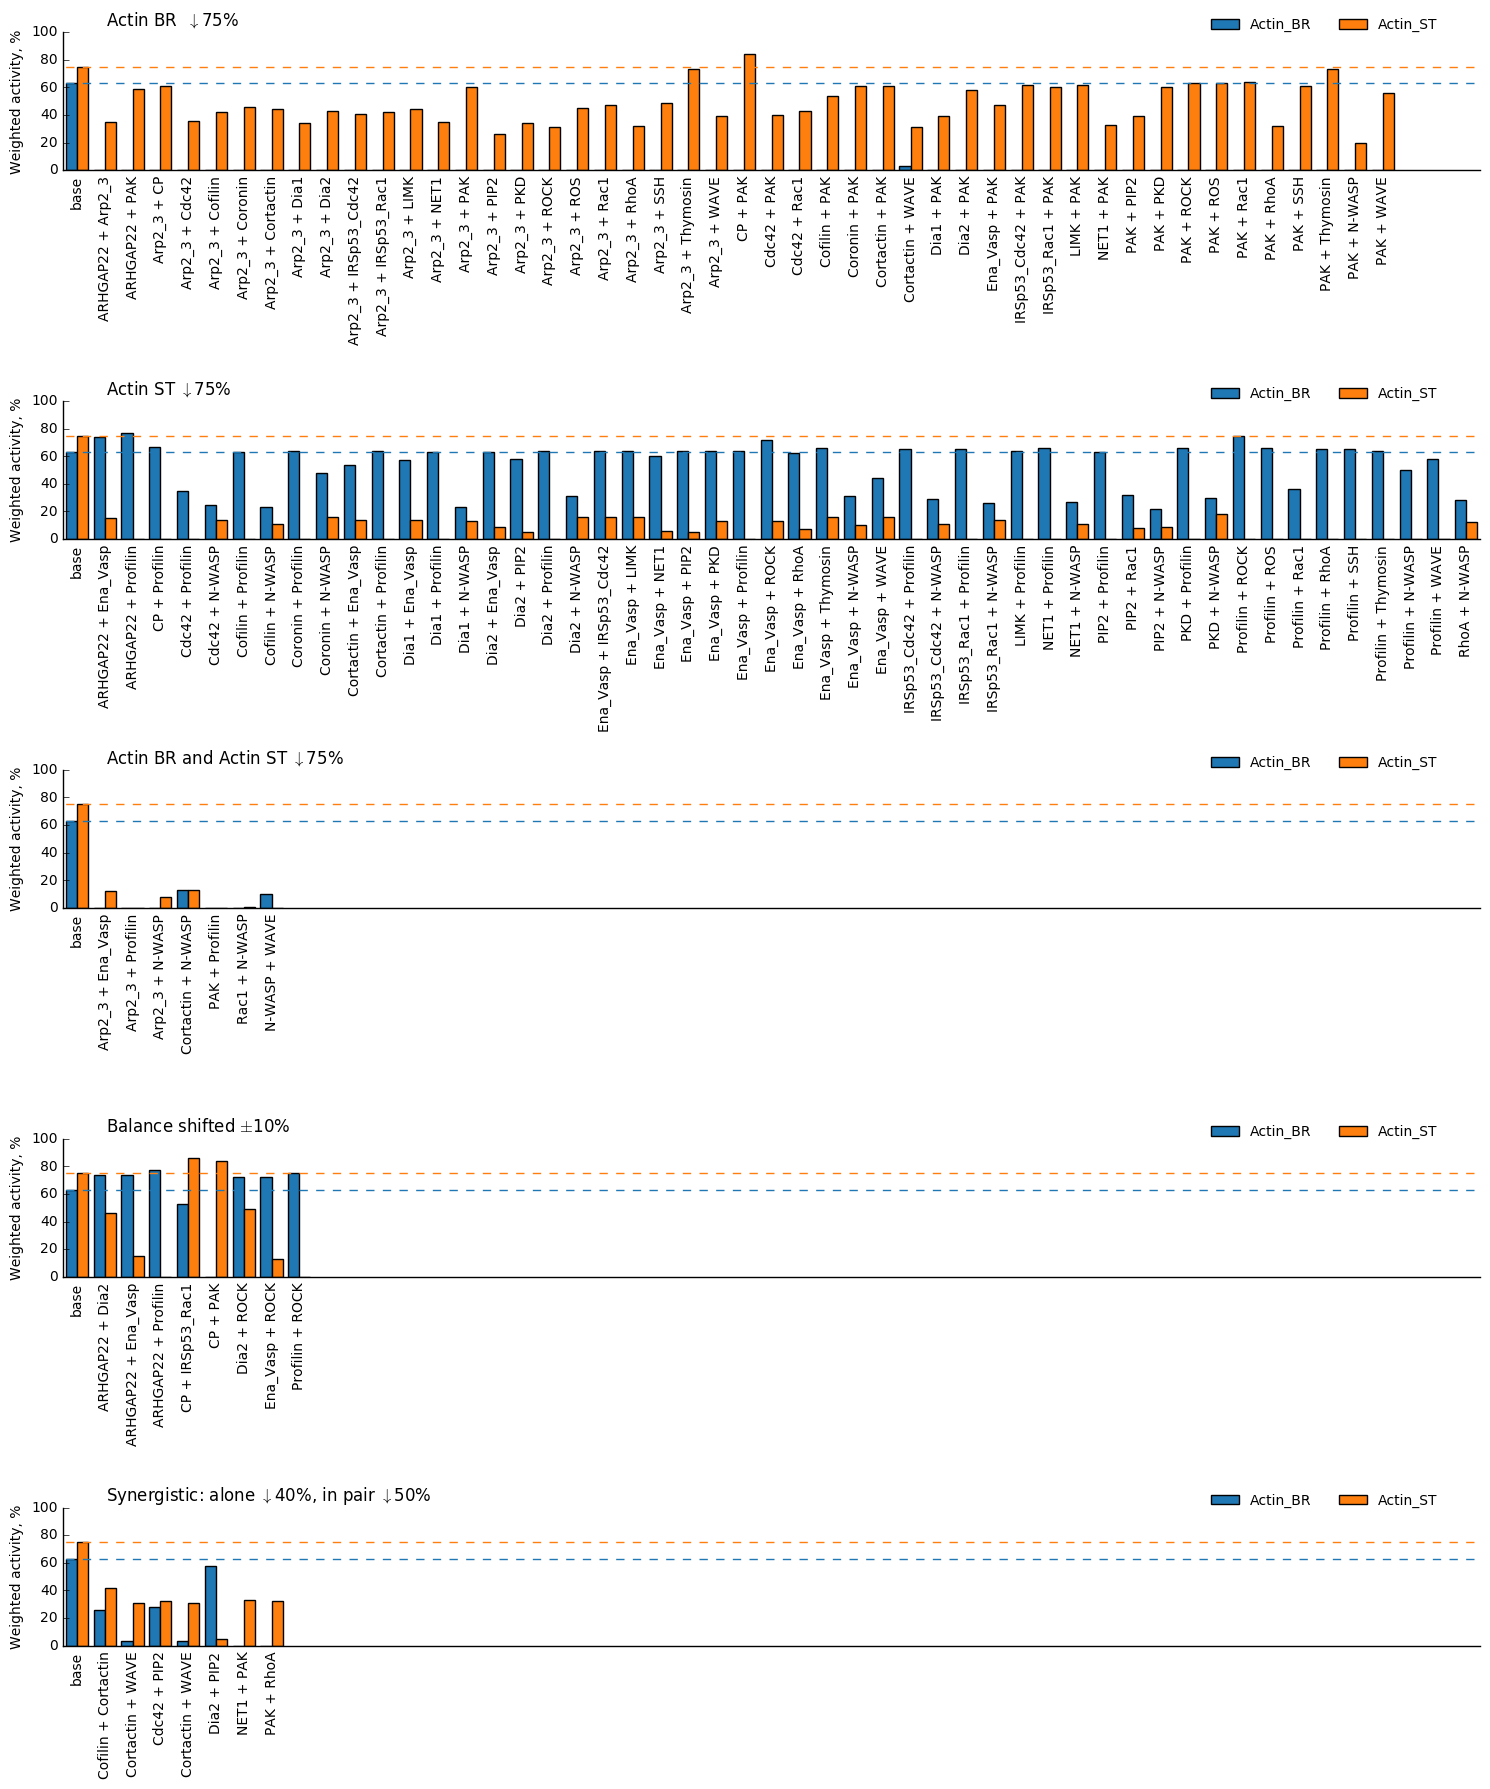

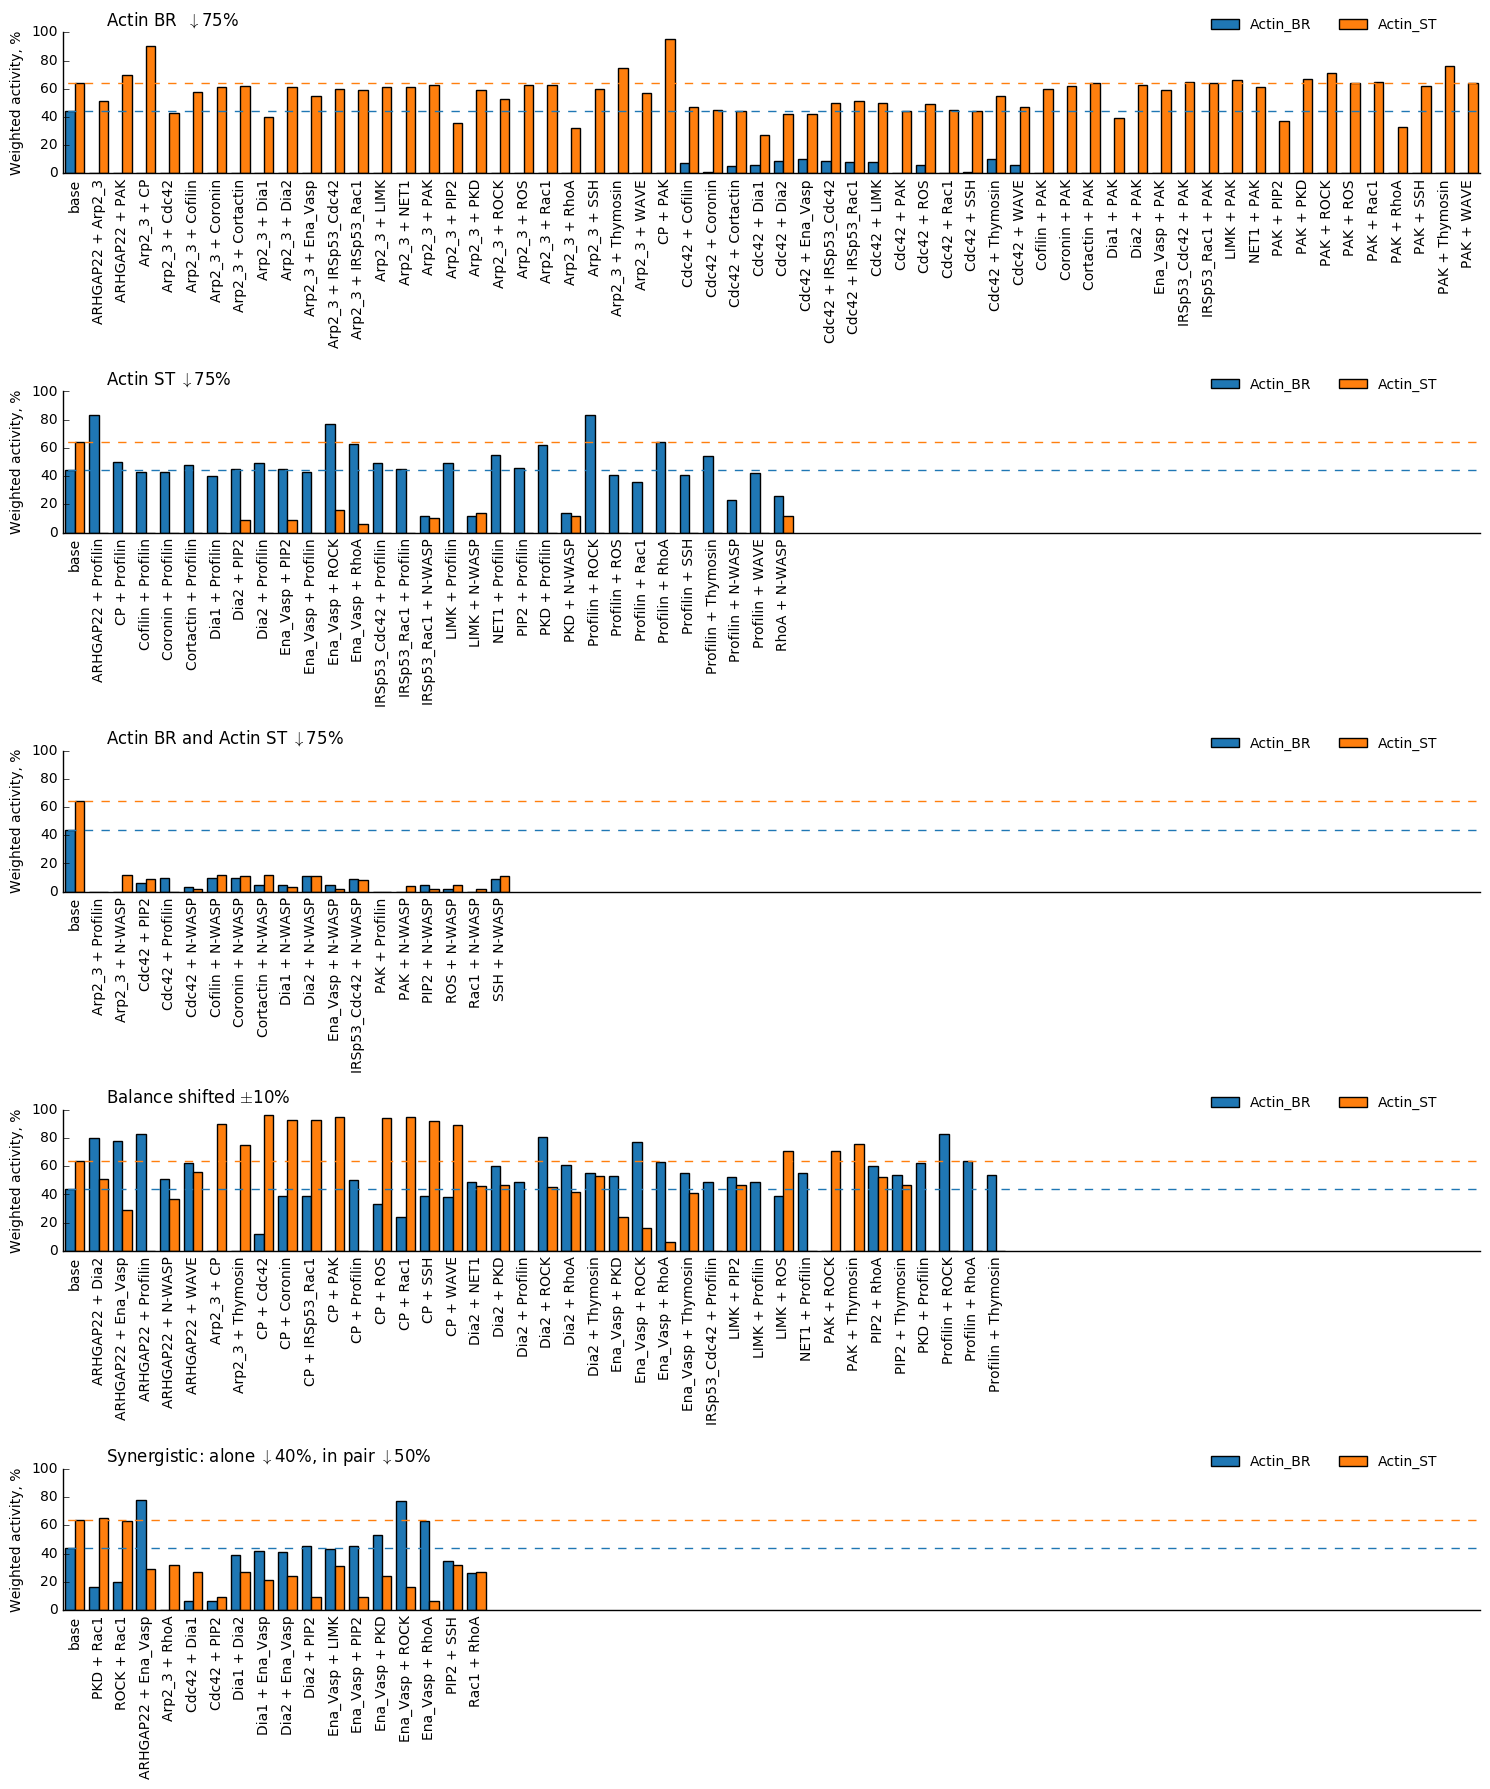

In [36]:
threshold = 0.75
balance_shift = 0.1
synergy_a = 0.40
synergy_b = 0.50

for report in reports:
    df = pd.read_csv('reports/{}/summary.csv'.format(report), index_col=0)    
    df_single = df.filter(regex='^({0})$'.format('|'.join(enzymes))).loc[[enz.Actin_BR, enz.Actin_ST]]
    
    df = df.filter(regex='^(base|({0})_({0}))$'.format('|'.join(enzymes))).loc[[enz.Actin_BR, enz.Actin_ST]]
    df.columns = df.columns.str.replace(r'^({0})_({0})$'.format('|'.join(enzymes)), r'\g<1> + \g<2>').str.replace('WASP', 'N-WASP')
    df = df.transpose()
    
    base_BR = df['Actin_BR']['base']
    base_ST = df['Actin_ST']['base']
    
    df_single.columns = df_single.columns.str.replace('WASP', 'N-WASP')
    df_single = df_single.transpose()
    
    nodes_BR = list(df_single[df_single['Actin_BR'] / base_BR >= 1.0 - synergy_a].index)    
    nodes_ST = list(df_single[df_single['Actin_ST'] / base_ST >= 1.0 - synergy_a].index)
    
    syn_BR = df.filter(regex='base|(({0}) \+ ({0}))'.format('|'.join(nodes_BR)), axis=0)
    syn_BR = syn_BR[(syn_BR.index == 'base') | 
                   (syn_BR['Actin_BR'] / base_BR <= 1.0 - synergy_b)]
    
    syn_BR = df.filter(regex='base|(({0}) \+ ({0}))'.format('|'.join(nodes_BR)), axis=0)
    syn_BR = syn_BR[(syn_BR.index == 'base') | 
                   (syn_BR['Actin_BR'] / base_BR <= 1.0 - synergy_b)]

    syn_ST = df.filter(regex='base|(({0}) \+ ({0}))'.format('|'.join(nodes_ST)), axis=0)
    syn_ST = syn_ST[(syn_ST['Actin_ST'] / base_ST <= 1.0 - synergy_b)]
    
    fig, axis = pl.subplots(5, 1, sharey=True, figsize=(15, 18))

    dfs = [
        df[(df.index == 'base') | 
           ((df['Actin_BR'] / base_BR <= 1.0 - threshold) & (df['Actin_ST'] / base_ST > 1.0 - threshold))],
        
        df[(df.index == 'base') | 
           ((df['Actin_BR'] / base_BR > 1.0 - threshold) & (df['Actin_ST'] / base_ST <= 1.0 - threshold))],
        
        df[(df.index == 'base') | 
           ((df['Actin_BR'] / base_BR <= 1.0 - threshold) & (df['Actin_ST'] / base_ST <= 1.0 - threshold))],
        
        df[(df.index == 'base') | 
           ((df['Actin_BR'] / base_BR <= 1.0 - balance_shift) & (df['Actin_ST'] / base_ST >= 1.0 + balance_shift)) | \
           ((df['Actin_BR'] / base_BR >= 1.0 + balance_shift) & (df['Actin_ST'] / base_ST <= 1.0 - balance_shift))],
        
        syn_BR.append(syn_ST)     
    ]

    names = [r'Actin BR  $\downarrow${0:.0f}%'.format(threshold * 100), 
             r'Actin ST $\downarrow${0:.0f}%'.format(threshold * 100), 
             r'Actin BR and Actin ST $\downarrow${0:.0f}%'.format(threshold * 100), 
             r'Balance shifted $\pm${0:.0f}%'.format(balance_shift * 100),
             r'Synergistic: alone $\downarrow${0:.0f}%, in pair $\downarrow${1:.0f}%'.format(synergy_a * 100, synergy_b * 100)
            ]

    maxn = max([len(d) for d in dfs])

    for i in range(5):
        plot_knockdowns(dfs[i], axis[i], names[i], maxn)

    pl.tight_layout()

    pl.savefig('charts/fig_4_{}.png'.format(report), bbox_inches='tight', dpi=300)
    pl.savefig('charts/fig_4_{}.svg'.format(report), bbox_inches='tight')
    pl.savefig('charts/fig_4_{}.eps'.format(report), bbox_inches='tight')


In [32]:
synergy_a = 0.40
synergy_b = 0.50

nodes_BR = list(df_single[df_single['Actin_BR'] / base_BR >= 1.0 - synergy_a].index)    
nodes_ST = list(df_single[df_single['Actin_ST'] / base_ST >= 1.0 - synergy_a].index)

syn_BR = df.filter(regex='base|(({0}) \+ ({0}))'.format('|'.join(nodes_BR)), axis=0)
syn_BR = syn_BR[(syn_BR.index == 'base') | 
               (syn_BR['Actin_BR'] / base_BR <= 1.0 - synergy_b)]

syn_ST = df.filter(regex='base|(({0}) \+ ({0}))'.format('|'.join(nodes_ST)), axis=0)
syn_ST = syn_ST[(syn_ST['Actin_ST'] / base_ST <= 1.0 - synergy_b)]


# nodes_BR

syn_BR.append(syn_ST).append(df_single)
# syn_ST

# , syn_ST

,Actin_BR,Actin_ST
base,63,75
Cofilin + Cortactin,26,42
Cortactin + WAVE,3,31
Cdc42 + PIP2,28,32
Cortactin + WAVE,3,31
Dia2 + PIP2,58,5
NET1 + PAK,0,33
PAK + RhoA,0,32
ARHGAP22,76,82
Arp2_3,0,44
